<a href="https://colab.research.google.com/github/20rd1/actividad_github/blob/main/JAORMO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**UNIDAD 1: TAREA 3**

Clonar el repositorio de github: https://github.com/20rd1/actividad_github.git

Se seleccionó el dataset G (https://www.kaggle.com/datasets/aakashjoshi123/exercise-and-fitness-metrics-dataset/data), sobre datos de ejercicio físico y salud.

In [178]:
!git clone https://github.com/20rd1/actividad_github.git


fatal: destination path 'actividad_github' already exists and is not an empty directory.


In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [180]:
df=pd.read_csv('/content/actividad_github/exercise_dataset.csv')
df.head()

,ID,Exercise,Calories Burn,Dream Weight,Actual Weight,Age,Gender,Duration,Heart Rate,BMI,Weather Conditions,Exercise Intensity
0,1,Exercise 2,286.959851,91.892531,96.301115,45,Male,37,170,29.426275,Rainy,5
1,2,Exercise 7,343.453036,64.165097,61.104668,25,Male,43,142,21.286346,Rainy,5
2,3,Exercise 4,261.223465,70.846224,71.766724,20,Male,20,148,27.899592,Cloudy,4
3,4,Exercise 5,127.183858,79.477008,82.984456,33,Male,39,170,33.729552,Sunny,10
4,5,Exercise 10,416.318374,89.960226,85.643174,29,Female,34,118,23.286113,Cloudy,3


In [181]:
df.shape

(3864, 12)

In [182]:
df.isnull().sum()       #Presencia de valores nulos en las distintas variables

,0
ID,0
Exercise,0
Calories Burn,0
Dream Weight,0
Actual Weight,0
Age,0
Gender,0
Duration,0
Heart Rate,0
BMI,0


In [183]:
# Incluir solo valores mayores a 0, para variables que no tiene sentido que tomen un valor menor a este.

df = df[df["Duration"] > 0]


In [184]:
df = df[df['Dream Weight'] > 0]

In [185]:
df = df[df['Actual Weight'] > 0]

In [186]:
df = df[df['Age'] > 0]

In [187]:
df = df[df['Duration'] > 0 ]

In [188]:
df = df[df['Heart Rate'] > 0]

In [189]:
df = df[df['BMI'] > 0]

In [190]:
df.describe()

,ID,Calories Burn,Dream Weight,Actual Weight,Age,Duration,Heart Rate,BMI,Exercise Intensity
count,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000
mean,1932.500000,301.861806,75.139263,75.188440,39.621118,40.190994,139.777950,26.801977,5.457298
std,1115.585048,115.828604,14.545824,14.845511,12.521721,11.765957,23.447528,4.746745,2.850896
min,1.000000,100.009403,50.001984,45.783747,18.000000,20.000000,100.000000,18.500014,1.000000
25%,966.750000,202.168837,62.373585,62.476906,29.000000,30.000000,119.000000,22.686774,3.000000
50%,1932.500000,299.742508,75.522136,75.544407,40.000000,40.000000,140.000000,26.861656,5.000000
75%,2898.250000,404.143688,87.707989,88.105767,51.000000,51.000000,160.000000,30.950380,8.000000
max,3864.000000,499.859262,99.985355,104.309600,60.000000,60.000000,180.000000,34.996639,10.000000


# **1. ANALISIS DEL PROBLEMA Y SELECCION DE TECNICA**
Este dataset contiene información sobre variables relacionadas a ejercicio fisico y salud, como:


*  Tipo de ejercicio
* Intensidad del ejercicio
* Duracion del ejercicio
* Frecuencia cardíaca promedio en ejercicio
*  Calorías quemadas
*  Peso ideal
* Peso actual
* Indice de masa corporal (IMC)
* Edad

El objetivo es realizar un análisis exploratorio de los datos para comprender la estructura del dataset, visualizar distribuciones y presencia de estadisticos descriptivos tanto de tendencia central como de dispersión.

Con los datos del dataset se podría plantear un problema de clusterizacion, ya que con las distintas variables se podrían organizar clusters de peso e IMC, que correlacionaran con distintas caracteristicas del ejercicio físico.




# 2. **POTENCIALES SESGOS**

**Sesgo de selección:**
La obtención de los datos puede no ser representativa de la población general, participando por ejemplo los sujetos más activos en el gimnasio y quedando fuera aquellos que entrenan menos o también aquellos con sobrepeso y/o obesidad, por pudor a ser pesados y/o a saber cuan lejos están de su peso ideal.

**Sesgo de medición**:
Por imprecisiones de los instrumentos de medición, siendo especialmente relevantes el método utilizado para registrar el peso, altura (para el cálculo de IMC) y el dispositivo usado para obtener la frecuencia cardíaca promedio en ejercicio. En relación a la frecuencia cardíaca otra fuente de error relacionada, es el tipo de ejercicio realizado, dada la menor precisión de la frecuencia cardíaca en actividades intermitentes.



# **3. EXPLORACION DE LOS DATOS**

Se realiza:


*  Clasificacion de variables en cuantitativas y cualitativas
*   Identificación de posibles fuentes de error de los datos
* Identificación de la cantidad de valores únicos por cada columna

Destaca que el dataframe se compone de 4 variables float (cuantitativas continuas), 5 variables tipo integer (cuantitativas discretas) y 3 variables tipo object (categóricas).

Es destacable que las variables integer + float representan mayoritariamente a variables númericas, exceptuando ID que es una codificación de un identificador.


*   ID: Identificación del sujeto mediante asignación de un número
* Calories Burn: Calorías quemadas en ejercicio expresadas como kcal, por tanto NO puede tomar valores negativos
* Dream Weight: Peso ideal del sujeto expresado en kg, por tanto NO puede tomar valores negativos
* Actual Weight: Peso del sujeto al momento de la valoracion expresado en kg, por tanto NO puede tomar valores negativos.
*   Age: Edad de los sujetos en años, por tanto NO puede tomar valores negativos.
* Duration: Duración de la sesión de ejercicio en minutos,  por tanto NO puede tomar valores negativos.
* Heart Rate: Frecuencia cardíaca promedio en ejercicio, expresado en latidos por minuto,  por tanto NO puede tomar valores negativos.
* BMI: Indice de masa corporal, NO puede tomar valores negativos.

* Exercise Intensity: Intensidad del ejercicio, probablemente expresada por Escala de percepcion de esfuerzo de 1-10 (RPE 10),  por tanto NO puede tomar valores negativos ni tampoco valores > 10

**IDENTIFICACION DE ERRORES**

1. Presencia de valores nulos: No se identifica la presencia de valores nulos en ninguna de las variables

2. Errores en tipo de datos: No se observan errores en este ámbito, encontrandose las variables númericas como tipo float o integer, mientras que las categoricas lo hacen como object.

3. Simetría de la distribución:

*   Calories Burn:  Distribución simétrica según valor de skewness
* Actual Weight: Distribución simétrica según valor de skewness
* Age: Distribución simétrica según valor de skewness
* Duration: Distribución simétrica según valor de skewness
* Heart Rate: Distribución simétrica según valor de skewness
* BMI: Distribución simétrica según valor de skewness
* Exercise Intesity: Distribución simétrica según valor de skewness

4. Presencia de outliers:


*   Calories Burn:  No presenta outliers al basarse en técnica de detección de outliers con +/- 3 DS
*   Dream Weight: No presenta outliers al basarse en técnica de detección de outliers con +/- 3 DS
* Actual Weight: No presenta outliers al basarse en técnica de detección de outliers con +/- 3 DS
* Age: No presenta outliers al basarse en técnica de detección de outliers con +/- 3 DS
* Duration: No presenta outliers al basarse en técnica de detección de outliers con +/- 3 DS
* Heart Rate: No presenta outliers al basarse en técnica de detección de outliers con +/- 3 DS
* BMI: No presenta outliers al basarse en técnica de detección de outliers con +/- 3 DS
* Exercise Intesity: No presenta outliers al basarse en técnica de detección de outliers con +/- 3 DS








In [191]:
#**ANALISIS EXPLORATORIO DE LOS DATOS**
df.shape          # Número de filas (3864) y columnas (12) del dataframe estudiado

(3864, 12)

In [192]:
df.info()           # Información general del dataframe, muestra que hay 12 variables y 3864 valores en cada variable.
                    # En relación al tipo de variable hay 4 variables tipo float (cuantitativas continuas), 3 tipo object (categóricas) y 5 tipo integer (cuantitativas discretas).
                    # No se presentan valores nulos en el dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  3864 non-null   int64  
 1   Exercise            3864 non-null   object 
 2   Calories Burn       3864 non-null   float64
 3   Dream Weight        3864 non-null   float64
 4   Actual Weight       3864 non-null   float64
 5   Age                 3864 non-null   int64  
 6   Gender              3864 non-null   object 
 7   Duration            3864 non-null   int64  
 8   Heart Rate          3864 non-null   int64  
 9   BMI                 3864 non-null   float64
 10  Weather Conditions  3864 non-null   object 
 11  Exercise Intensity  3864 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 362.4+ KB


In [193]:
df.isnull().sum()         # En esta línea se ha realizado la suma de los valores nulos por cada columna, lo que nuevamente confirma que no hay valores nulos en el dataset, ya que la suma es 0 en todas las columnas.
                          # Al no existir valores nulos, no es necesaria la imputación de estos.

,0
ID,0
Exercise,0
Calories Burn,0
Dream Weight,0
Actual Weight,0
Age,0
Gender,0
Duration,0
Heart Rate,0
BMI,0


In [194]:
df.dtypes           #Tipos de variable en cada columna
                    # No se aprecian posibles errores en este aspecto, ya que las variables numericas se encuentran como float o integer y las categoricas lo estan como object.
                    # Destaca que las integer incluidas son, exceptuando ID que corresponde a un identificador numerico, el resto son todas realmente variables númericas (Age, Duration, Heart Rate y Exercise Intensity - probablemente mediante percepción de esfuerzo/RPE) y no parecen ser codificaciones de variables categóricas.

,0
ID,int64
Exercise,object
Calories Burn,float64
Dream Weight,float64
Actual Weight,float64
Age,int64
Gender,object
Duration,int64
Heart Rate,int64
BMI,float64


In [195]:
df.nunique()          # Presencia de valores únicos en cada columna, por ejemplo vemos que en el caso del género solo hay 2 valores (Masculino y Femenino), mientras que en las variables de calorías quemadas, peso ideal y peso actual hay 3864 valores.

,0
ID,3864
Exercise,10
Calories Burn,3864
Dream Weight,3864
Actual Weight,3864
Age,43
Gender,2
Duration,41
Heart Rate,81
BMI,3864


# **4. ANALISIS DESCRIPTIVO DE VARIABLES CUANTITATIVAS**

En esta sección se analizan para cada variable:



*   Medidas de tendencia central (media, mediana, moda)
*   Medidas de dispersión (desviación estandar, varianza)
* Medidas de posición (rango, cuartiles y rango intercuartilico)
* Límites para detección de outliers


**1.CALORIES BURN**

**Medidas de tendencia central:**

*   Media = 301.8618062378883
*   Mediana = 299.7425076
* Moda =  No presenta moda, ya que tiene 3864 valores únicos.

**Medidas de dispersión**
* Desviación estándar = 115.82860378386366
* Varianza = 13416.265454519274

Para la detección de outliers tenemos que mediante la técnica de +/- 3 DS, sus limites quedan definidos como: inferior = 0 (el valor calculado es -45.62400511370271, pero es un parámetro que realmente no puede tomar valores negativos) y superior = 649.3476175894793

**Medidas de posición**


*   Rango = 399.8498591
*   Primer cuartil (Q1) = 202.16883695
* Segundo cuartil (Q2) = 299.7425076
* Tercer cuartil (Q3) = 404.1436878
* Rango intercuartilico (IQR) = 201.97485085

Para la detección de outliers mediante la utilización del rango intercuartilico, los límites quedan definidos como: inferior = 0 (el valor calculado es -100.79343932500001, pero es un parámetro que realmente no puede tomar valores negativos) y superior = 707.105964075

**Simetría**: Hay distribución simétrica de los valores, con un valor de skew = -0.0017109629878977119. Dada dicha distribución en esta variable se puede utilizar la técnica de +/- 3 DS para detectar la presencia de outliers.

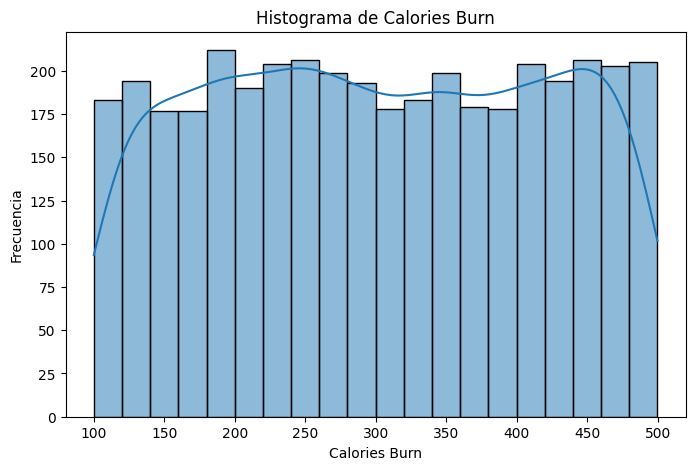

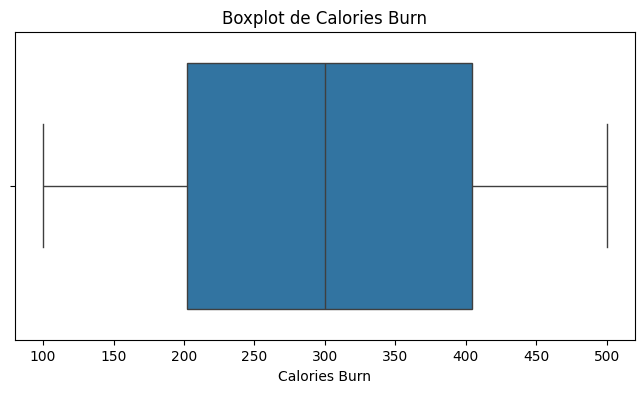


In [196]:
df_no_ID=df.drop('ID', axis=1)          #Eliminación de ID (variable no númerica) para realizar estadisticos descriptivos del resto de las variables númericas.
df_no_ID.describe()

,Calories Burn,Dream Weight,Actual Weight,Age,Duration,Heart Rate,BMI,Exercise Intensity
count,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000
mean,301.861806,75.139263,75.188440,39.621118,40.190994,139.777950,26.801977,5.457298
std,115.828604,14.545824,14.845511,12.521721,11.765957,23.447528,4.746745,2.850896
min,100.009403,50.001984,45.783747,18.000000,20.000000,100.000000,18.500014,1.000000
25%,202.168837,62.373585,62.476906,29.000000,30.000000,119.000000,22.686774,3.000000
50%,299.742508,75.522136,75.544407,40.000000,40.000000,140.000000,26.861656,5.000000
75%,404.143688,87.707989,88.105767,51.000000,51.000000,160.000000,30.950380,8.000000
max,499.859262,99.985355,104.309600,60.000000,60.000000,180.000000,34.996639,10.000000


In [197]:
# Detección de outliers usando +/- 3 DS, dada distribución simetrica (normal) en las variables incluidas

numericas = df_no_ID.select_dtypes(include=["int64", "float64"])      # Seleccionar solo variables cuantitativas/numericas (integer + float)

outliers_sd = {}                                                      # Construccion de diccionario para guardar media, limites y numero de outliers para cada variable cuantitativa incluida

for col in numericas.columns:                                         # Comando de ejecutar en cada columna de variable numerica
    media = numericas[col].mean()                                     # Obtención de medida de las columnas de variables numericas
    std = numericas[col].std()                                        # Obtención de desviacion estandar de las columnas de variables numericas

    lower = media - 3*std                                             # Limite inferior para deteccion de outlier
    upper = media + 3*std                                             # Limite superior para deteccion de outlier

    n_outliers = numericas[(numericas[col] < lower) | (numericas[col] > upper)].shape[0]      # Contar cuantos outlier hay, considerando los limite inferior y superior ya definidos

    outliers_sd[col] = {
        "Media": media,
        "Desv.Est": std,
        "Lower Bound": lower,
        "Upper Bound": upper,
        "N_Outliers": n_outliers
    }

outliers_sd_df = pd.DataFrame(outliers_sd).T
outliers_sd_df


,Media,Desv.Est,Lower Bound,Upper Bound,N_Outliers
Calories Burn,301.861806,115.828604,-45.624005,649.347618,0.0
Dream Weight,75.139263,14.545824,31.501792,118.776735,0.0
Actual Weight,75.188440,14.845511,30.651908,119.724973,0.0
Age,39.621118,12.521721,2.055954,77.186282,0.0
Duration,40.190994,11.765957,4.893121,75.488866,0.0
Heart Rate,139.777950,23.447528,69.435367,210.120534,0.0
BMI,26.801977,4.746745,12.561741,41.042213,0.0
Exercise Intensity,5.457298,2.850896,-3.095390,14.009987,0.0


In [198]:

# Estadisticos de tendencia central de Calories Burn

media = df_no_ID['Calories Burn'].mean()      # Media de Calories Burn
mediana = df_no_ID['Calories Burn'].median()  # Mediana de Calories Burn
moda = df_no_ID['Calories Burn'].mode()       # Moda de Calories Burn


print(media)
print(mediana)
print(moda)       #No hay moda, ya que como vimos previamente, Calories Burn tiene 3864 valores diferentes


301.8618062378883
299.7425076
0       100.009403
1       100.014712
2       100.031027
3       100.335105
4       100.640541
           ...    
3859    499.138425
3860    499.244532
3861    499.381084
3862    499.469389
3863    499.859262
Name: Calories Burn, Length: 3864, dtype: float64


In [199]:
# Estadisticos de dispersión de Calories Burn

std = df_no_ID['Calories Burn'].std()       #Desviacion estandar de Calories Burn
var = df_no_ID['Calories Burn'].var()       #Varianza de Calories Burn

linf = media - 3 * std                      # Limite inferior para deteccion de outlier mediante - 3DS
lsup = media + 3 * std                      # Limite superior para deteccion de outlier mediante + 3DS

print(std)
print(var)
print(linf)
print(lsup)

115.82860378386366
13416.265454519274
-45.62400511370271
649.3476175894793


In [200]:
# Medidas de posición de Calories Burn

rango = df_no_ID['Calories Burn'].max() - df_no_ID['Calories Burn'].min()   # Rango (Max - min)
q1 = df_no_ID['Calories Burn'].quantile(0.25)                              # Primer cuartil
q2 = df_no_ID['Calories Burn'].quantile(0.50)                              # Segundo cuartil, equivale a la mediana
q3 = df_no_ID['Calories Burn'].quantile(0.75)                              # Tercer cuartil
iqr = q3 - q1                                                               # Rango intercuartilico
linf = q1 - 1.5 * iqr                                                       # Limite inferior para deteccion de outlier mediante IQR
lsup = q3 + 1.5 * iqr                                                       # Limite superior para deteccion de outlier mediante IQR

print(rango)
print(q1)
print(q2)
print(q3)
print(iqr)
print(linf)
print(lsup)

399.8498591
202.16883695
299.7425076
404.1436878
201.97485085
-100.79343932500001
707.105964075


In [201]:
# Simetria de valores de Calories Burn

skew = df_no_ID['Calories Burn'].skew()
print(skew)

-0.0017109629878977119


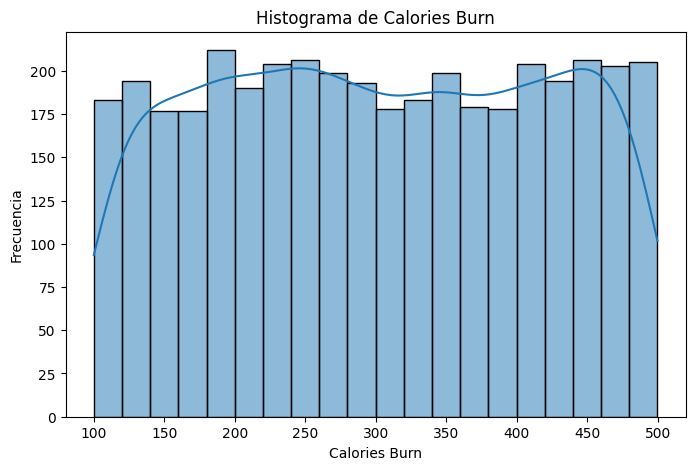

In [202]:
# Histograma que muestra la distribucion de frecuencia de las calorias quemadas en ejercicio.

plt.figure(figsize=(8,5))
sns.histplot(df_no_ID['Calories Burn'], bins=20, kde=True)
plt.xlabel('Calories Burn')
plt.ylabel('Frecuencia')
plt.title('Histograma de Calories Burn')
plt.show()

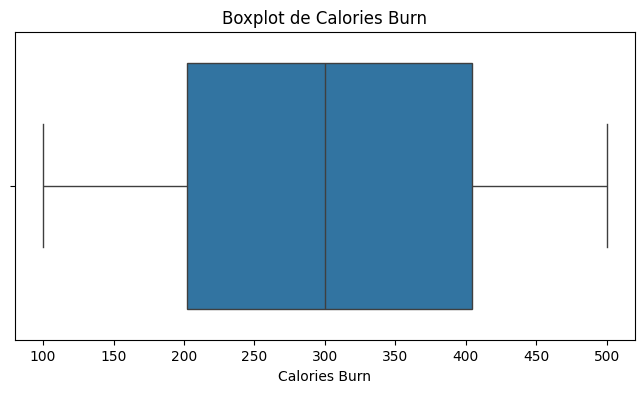

In [203]:
# Gráfico de boxplot para Calories Burn, sin presencia de outliers ya que limite inferior es de -45.6 y límite superior es 649.3

plt.figure(figsize=(8,4))
sns.boxplot(x=df_no_ID['Calories Burn'])
plt.title('Boxplot de Calories Burn')
plt.xlabel('Calories Burn')
plt.show()

2. **DREAM WEIGHT**

**Medidas de tendencia central:**

*   Media = 75.13926336705745
*   Mediana = 75.522136285
* Moda = No presenta moda, ya que tiene 3864 valores únicos.

**Medidas de dispersión**

*   Desviación estándar = 14.545823767903373
*   Varianza = 211.58098908690266

Para la detección de outliers tenemos que mediante la técnica de +/- 3 DS, sus limites quedan definidos como: inferior = 31.50179206334733 y superior = 118.77673467076758


**Medidas de posición**


*   Rango = 49.98337161
*   Primer cuartil (Q1) = 62.373584789999995
* Segundo cuartil (Q2) = 75.522136285
* Tercer cuartil (Q3) = 87.7079891775
* Rango intercuartilico (IQR) = 25.3344043875

Para la detección de outliers mediante la utilización del rango intercuartilico, los límites quedan definidos como: inferior = 24.371978208749994 y superior = 125.70959575875

**Simetría**: Tambien la distribución es simétrica con un valor de skew tendiente a 0 (-0.034096496688231816). Por lo anterior, también se puede utilizar +/- 3 DS para la detección de outliers.

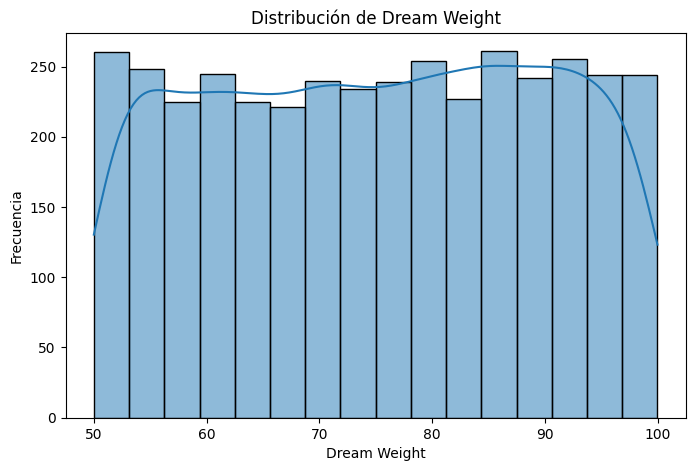


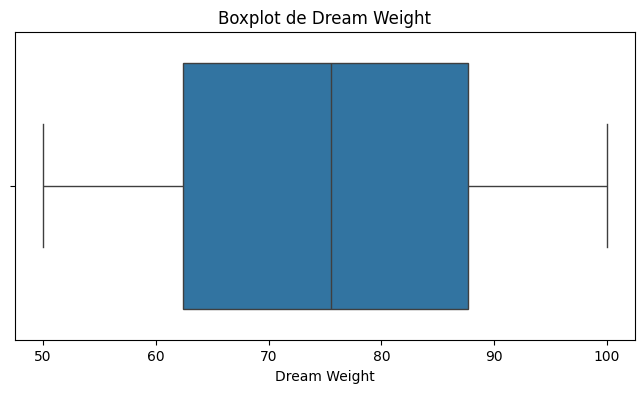

In [204]:

# Estadisticos de tendencia central de Dream Weight

media = df_no_ID['Dream Weight'].mean()      # Media de Dream Weight
mediana = df_no_ID['Dream Weight'].median()  # Mediana de Dream Weight
moda = df_no_ID['Dream Weight'].mode()       # Moda de Dream Weight


print(media)
print(mediana)
print(moda)       #No hay moda, ya que como vimos previamente, Dream Weight tiene 3864 valores diferentes


75.13926336705745
75.522136285
0       50.001984
1       50.024630
2       50.038781
3       50.041738
4       50.061249
          ...    
3859    99.897515
3860    99.916769
3861    99.924465
3862    99.983694
3863    99.985355
Name: Dream Weight, Length: 3864, dtype: float64


In [205]:
# Estadisticos de dispersión de Dream Weight

std = df_no_ID['Dream Weight'].std()       #Desviacion estandar de Dream Weight
var = df_no_ID['Dream Weight'].var()       #Varianza de Dream Weight

linf = media - 3 * std                      # Limite inferior para deteccion de outlier mediante - 3DS
lsup = media + 3 * std                      # Limite superior para deteccion de outlier mediante + 3DS

print(std)
print(var)
print(linf)
print(lsup)

14.545823767903373
211.58098908690266
31.50179206334733
118.77673467076758


In [206]:
# Medidas de posición de Dream Weight

rango = df_no_ID['Dream Weight'].max() - df_no_ID['Dream Weight'].min()   # Rango (Max - min)
q1 = df_no_ID['Dream Weight'].quantile(0.25)                              # Primer cuartil
q2 = df_no_ID['Dream Weight'].quantile(0.50)                              # Segundo cuartil, equivale a la mediana
q3 = df_no_ID['Dream Weight'].quantile(0.75)                              # Tercer cuartil
iqr = q3 - q1                                                               # Rango intercuartilico
linf = q1 - 1.5 * iqr                                                       # Limite inferior para deteccion de outlier mediante IQR
lsup = q3 + 1.5 * iqr                                                       # Limite superior para deteccion de outlier mediante IQR

print(rango)
print(q1)
print(q2)
print(q3)
print(iqr)
print(linf)
print(lsup)

49.98337161
62.373584789999995
75.522136285
87.7079891775
25.3344043875
24.371978208749994
125.70959575875


In [207]:
# Simetria de valores de Dream Weight

skew = df_no_ID['Dream Weight'].skew()
print(skew)


-0.034096496688231816


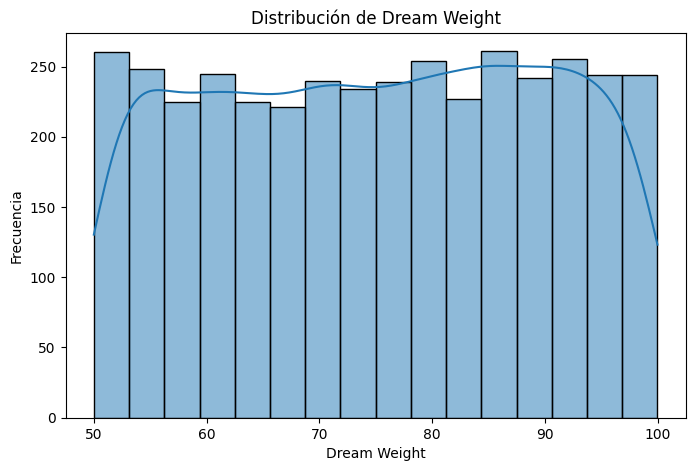

In [208]:
# Histograma de Dream Weight
plt.figure(figsize=(8,5))
sns.histplot(df['Dream Weight'], kde=True)
plt.title('Distribución de Dream Weight')
plt.xlabel('Dream Weight')
plt.ylabel('Frecuencia')
plt.show()

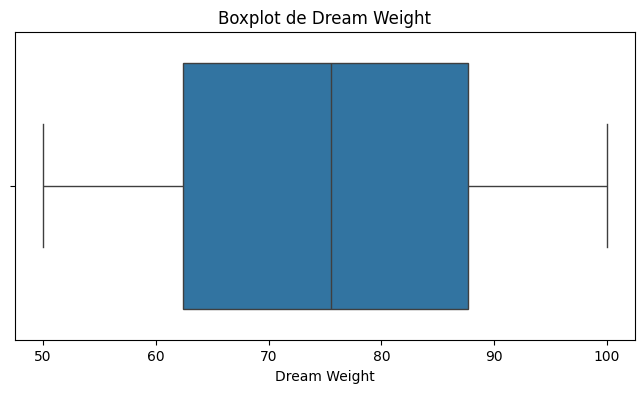

In [209]:
# Gráfico de boxplot de Dream Weight, no hay presencia de outliers, ya que límite inferior es 31.5 y límite superior es 118.7

plt.figure(figsize=(8,4))
sns.boxplot(x=df['Dream Weight'])
plt.title('Boxplot de Dream Weight')
plt.xlabel('Dream Weight')
plt.show()

3. **ACTUAL WEIGHT**

**Medidas de tendencia central:**

*   Media = 75.1884401165062
*   Mediana = 75.544407485
* Moda = No presenta moda, ya que tiene 3864 valores únicos.

**Medidas de dispersión**

*   Desviación estándar = 14.845510837885678
*   Varianza = 220.38919203778113

Para la detección de outliers tenemos que mediante la técnica de +/- 3 DS, sus limites quedan definidos como: inferior = 30.651907602849164 y superior = 119.72497263016324

**Medidas de posición**


*   Rango = 58.52585313
*   Primer cuartil (Q1) = 62.476906405
* Segundo cuartil (Q2) = 75.544407485
* Tercer cuartil (Q3) = 88.10576654500001
* Rango intercuartilico (IQR) = 25.628860140000008

Para la detección de outliers mediante la utilización del rango intercuartilico, los límites quedan definidos como: inferior = 24.033616194999986 y superior = 126.54905675500002

**Simetría**: Tambien la distribución es simétrica con un valor de skew tendiente a 0 (-0.03022047094725708) Por lo anterior, también se puede utilizar +/- 3 DS para la detección de outliers.

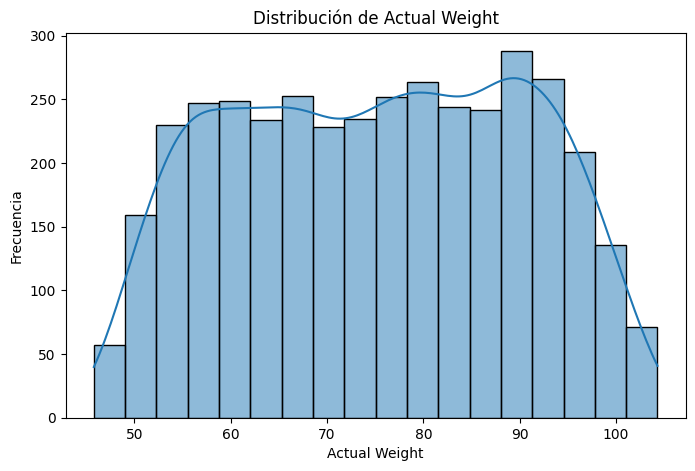

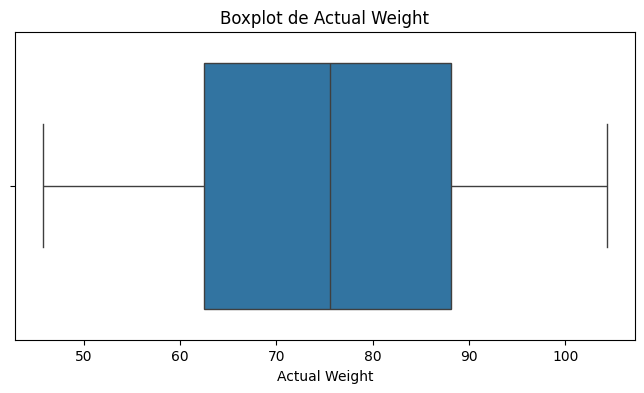

In [210]:
# Medidas de tendencia central de Actual Weight

media = df_no_ID['Actual Weight'].mean()      # Media de Actual Weight
mediana = df_no_ID['Actual Weight'].median()  # Mediana de Actual Weight
moda = df_no_ID['Actual Weight'].mode()       # Moda de Actual Weight


print(media)
print(mediana)
print(moda)

75.1884401165062
75.544407485
0        45.783747
1        46.011826
2        46.158512
3        46.390488
4        46.441858
           ...    
3859    103.916291
3860    103.972289
3861    104.106472
3862    104.181354
3863    104.309600
Name: Actual Weight, Length: 3864, dtype: float64


In [211]:
# Medidas de dispersión de Actual Weight

std = df_no_ID['Actual Weight'].std()       #Desviacion estandar de Actual Weight
var = df_no_ID['Actual Weight'].var()       #Varianza de Actual Weight

linf = media - 3 * std                      # Limite inferior para deteccion de outlier mediante - 3DS
lsup = media + 3 * std                      # Limite superior para deteccion de outlier mediante + 3DS

print(std)
print(var)
print(linf)
print(lsup)

14.845510837885678
220.38919203778113
30.651907602849164
119.72497263016324


In [212]:
# Medidas de posición de Actual Weight

rango = df_no_ID['Actual Weight'].max() - df_no_ID['Actual Weight'].min()
q1 = df_no_ID['Actual Weight'].quantile(0.25)
q2 = df_no_ID['Actual Weight'].quantile(0.50)
q3 = df_no_ID['Actual Weight'].quantile(0.75)
iqr = q3 - q1
linf = q1 - 1.5 * iqr
lsup = q3 + 1.5 * iqr

print(rango)
print(q1)
print(q2)
print(q3)
print(iqr)
print(linf)
print(lsup)

58.52585313
62.476906405
75.544407485
88.10576654500001
25.628860140000008
24.033616194999986
126.54905675500002


In [213]:
# Simetria de Actual Weight
skew = df_no_ID['Actual Weight'].skew()
print(skew)

-0.03022047094725708


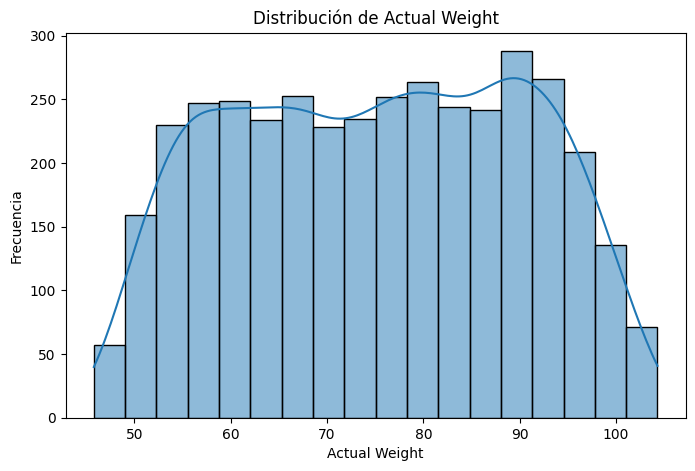

In [214]:
# Histograma de distribucion de Actual Weight

plt.figure(figsize=(8,5))
sns.histplot(df_no_ID['Actual Weight'], kde=True)
plt.title('Distribución de Actual Weight')
plt.xlabel('Actual Weight')
plt.ylabel('Frecuencia')
plt.show()

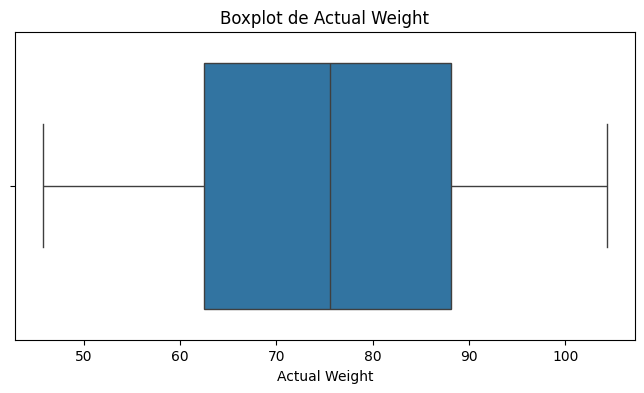

In [215]:
# Gráfico de boxplot de Actual Weight

plt.figure(figsize=(8,4))
sns.boxplot(x=df_no_ID['Actual Weight'])
plt.title('Boxplot de Actual Weight')
plt.xlabel('Actual Weight')
plt.show()

4. **AGE**

**Medidas de tendencia central:**

*   Media = 39.62111801242236
*   Mediana = 40.0
* Moda = 59, con 123 apariciones

**Medidas de dispersión**

*   Desviación estándar = 12.521721399251044
*   Varianza = 156.79350680046153

Para la detección de outliers tenemos que mediante la técnica de +/- 3 DS, sus limites quedan definidos como: inferior = 2.0559538146692233 y superior = 77.18628221017549

**Medidas de posición**


*   Rango = 42
*   Primer cuartil (Q1) = 29.0
* Segundo cuartil (Q2) = 40.0
* Tercer cuartil (Q3) = 51.0
* Rango intercuartilico (IQR) = 22.0

Para la detección de outliers mediante la utilización del rango intercuartilico, los límites quedan definidos como: inferior = 0 (el valor calculado es -4.0, pero es un parámetro que no puede tomar valores negativos) y superior = 84.0

**Simetría**: Tambien la distribución es simétrica con un valor de skew tendiente a 0, con un valor de -0.059384087348008784. Por lo anterior, también se puede utilizar +/- 3 DS para la detección de outliers.

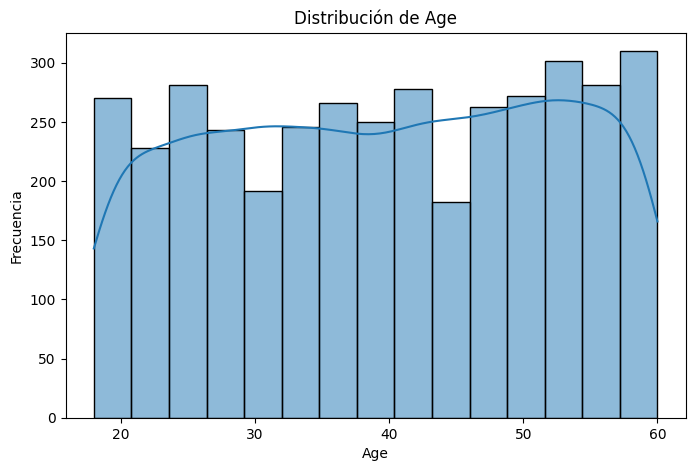


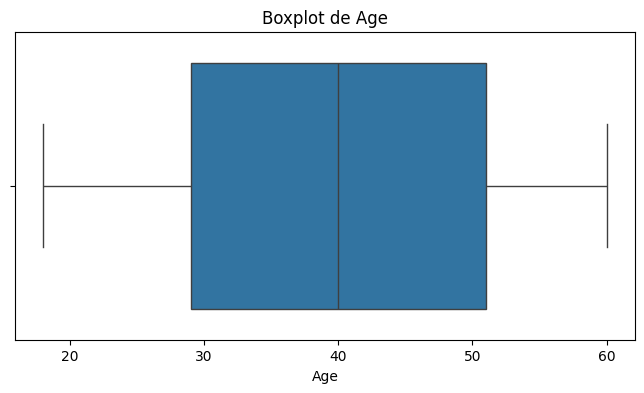

In [216]:
# Medidas de tendencia central de Age

media = df_no_ID['Age'].mean()
mediana = df_no_ID['Age'].median()
moda = df_no_ID['Age'].mode()
frecuencia_moda = df_no_ID['Age'].value_counts()[moda]

print(media)
print(mediana)
print(moda)
print(frecuencia_moda)

39.62111801242236
40.0
0    59
Name: Age, dtype: int64
Age
59    123
Name: count, dtype: int64


In [217]:
# Medidas de dispersión de Age

std = df_no_ID['Age'].std()
var = df_no_ID['Age'].var()

linf = media - 3 * std
lsup = media + 3 * std

print(std)
print(var)
print(linf)
print(lsup)

12.521721399251044
156.79350680046153
2.0559538146692233
77.18628221017549


In [218]:
# Medidas de posición de Age

rango = df_no_ID['Age'].max() - df_no_ID['Age'].min()
q1 = df_no_ID['Age'].quantile(0.25)
q2 = df_no_ID['Age'].quantile(0.50)
q3 = df_no_ID['Age'].quantile(0.75)
iqr = q3 - q1
linf = q1 - 1.5 * iqr
lsup = q3 + 1.5 * iqr

print(rango)
print(q1)
print(q2)
print(q3)
print(iqr)

print(linf)
print(lsup)


42
29.0
40.0
51.0
22.0
-4.0
84.0


In [219]:
# Simetria de valores de Age

skewness = df_no_ID['Age'].skew()

print(skewness)

-0.059384087348008784


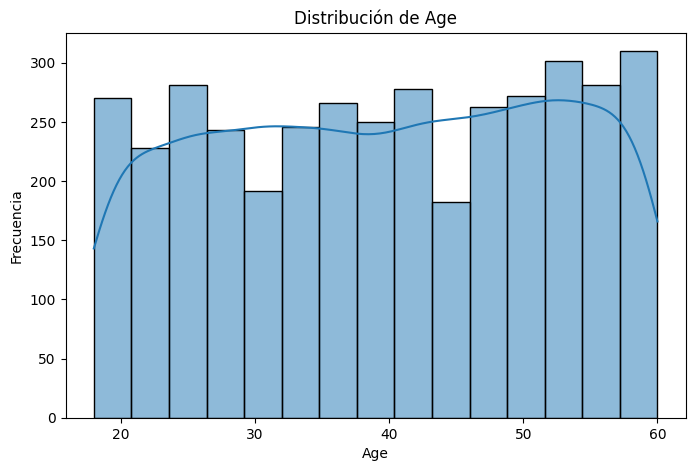

In [220]:
# Histograma de Age

plt.figure(figsize=(8,5))
sns.histplot(df_no_ID['Age'], kde=True)
plt.title('Distribución de Age')
plt.xlabel('Age')
plt.ylabel('Frecuencia')
plt.show()

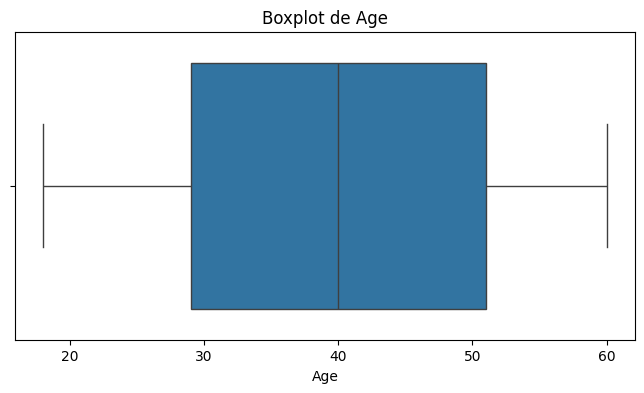

In [221]:
# Gráfico de Boxplot de Age

plt.figure(figsize=(8,4))
sns.boxplot(x=df_no_ID['Age'])
plt.title('Boxplot de Age')
plt.xlabel('Age')
plt.show()

4. **DURATION**

**Medidas de tendencia central:**

*   Media = 40.190993788819874
*   Mediana = 40.0
* Moda =  43, con 112 apariciones.


**Medidas de dispersión**

*   Desviación estándar = 11.765957451308985
*   Varianza = 138.43775474601344

Para la detección de outliers tenemos que mediante la técnica de +/- 3 DS, sus limites quedan definidos como: inferior = 4.893121434892919 y superior = 75.48886614274683

**Medidas de posición**


*   Rango = 40
*   Primer cuartil (Q1) = 30.0
* Segundo cuartil (Q2) = 40.0
* Tercer cuartil (Q3) = 51.0
* Rango intercuartilico (IQR) = 21.0

Para la detección de outliers mediante la utilización del rango intercuartilico, los límites quedan definidos como: inferior es 0 (el valor calculado es -1.5 , pero es un parámetro que no puede tomar valores negativos) y superior = 82.5

**Simetría**: Tambien la distribución es simétrica con un valor de skew tendiente a 0, con un valor de -0.014402094148997062 . Por lo anterior, también se puede utilizar +/- 3 DS para la detección de outliers.

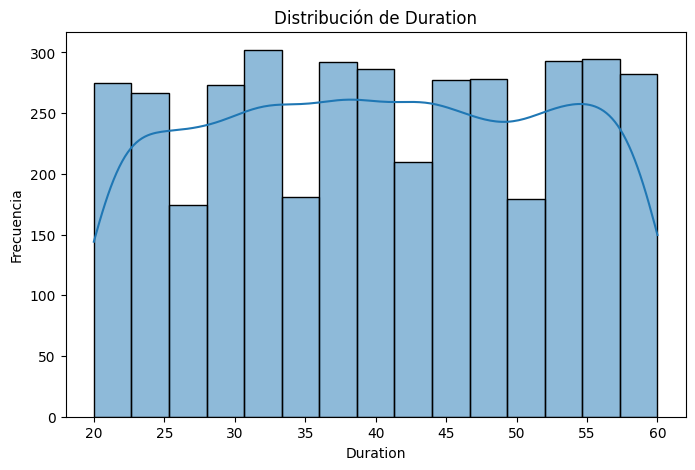

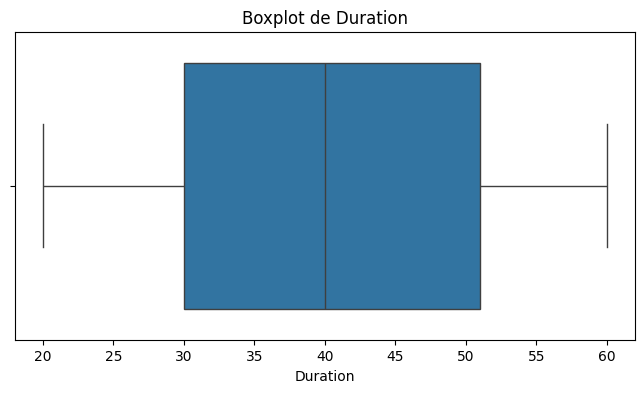

In [222]:
# Medidas de tendencia central de Duration

media = df_no_ID['Duration'].mean()
mediana = df_no_ID['Duration'].median()
moda = df_no_ID['Duration'].mode()
frecuencia_moda = df_no_ID['Duration'].value_counts()[moda]

print(media)
print(mediana)
print(moda)
print(frecuencia_moda)


40.190993788819874
40.0
0    43
Name: Duration, dtype: int64
Duration
43    112
Name: count, dtype: int64


In [223]:
# Medidas de dispersión de Duration

std = df_no_ID['Duration'].std()
var = df_no_ID['Duration'].var()

linf = media - 3 * std
lsup= media + 3 * std

print(std)
print(var)
print(linf)
print(lsup)

11.765957451308985
138.43775474601344
4.893121434892919
75.48886614274683


In [224]:
# Medidas de posición de Duration

rango = df_no_ID['Duration'].max() - df_no_ID['Duration'].min()
q1 = df_no_ID['Duration'].quantile(0.25)
q2 = df_no_ID['Duration'].quantile(0.50)
q3 = df_no_ID['Duration'].quantile(0.75)
iqr = q3 - q1
linf = q1 - 1.5 * iqr
lsup = q3 + 1.5 * iqr

print(rango)
print(q1)
print(q2)
print(q3)
print(iqr)

print(linf)
print(lsup)

40
30.0
40.0
51.0
21.0
-1.5
82.5


In [225]:
# Simetria de valores Duration

skewness = df_no_ID['Duration'].skew()

print(skewness)

-0.014402094148997062


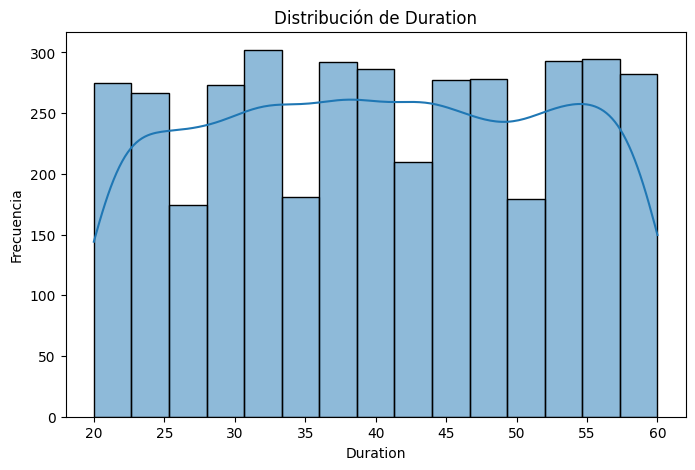

In [226]:
# Histograma de Duration

plt.figure(figsize=(8,5))
sns.histplot(df_no_ID['Duration'], kde=True)
plt.title('Distribución de Duration')
plt.xlabel('Duration')
plt.ylabel('Frecuencia')
plt.show()

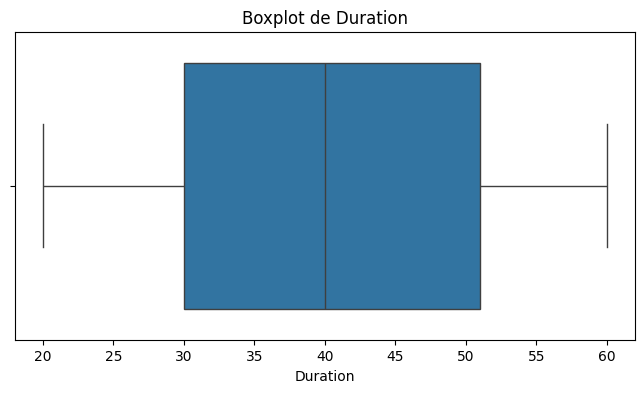

In [227]:
# Gráfico de Boxplot de Duration

plt.figure(figsize=(8,4))
sns.boxplot(x=df_no_ID['Duration'])
plt.title('Boxplot de Duration')
plt.xlabel('Duration')
plt.show()

4. **HEART RATE**

**Medidas de tendencia central:**

*   Media = 139.777950310559
*   Mediana = 140.0
* Moda =  103 y 152, ambos con 62 apariciones.

**Medidas de dispersión**

*   Desviación estándar = 23.447527801932168
*   Varianza = 549.786560022382

Para la detección de outliers tenemos que mediante la técnica de +/- 3 DS, sus limites quedan definidos como: inferior es 69.43536690476249  y superior es 210.1205337163555

**Medidas de posición**


*   Rango = 80
*   Primer cuartil (Q1) = 119.0
* Segundo cuartil (Q2) = 140.0
* Tercer cuartil (Q3) = 160.0
* Rango intercuartilico (IQR) = 41.0


Para la detección de outliers mediante la utilización del rango intercuartilico, los límites quedan definidos como: inferior es 57.5 y superior es 221.5

**Simetría**: Tambien la distribución es simétrica con un valor de skew tendiente a 0, con un valor de -0.0022989183309950257. Por lo anterior, también se puede utilizar +/- 3 DS para la detección de outliers.

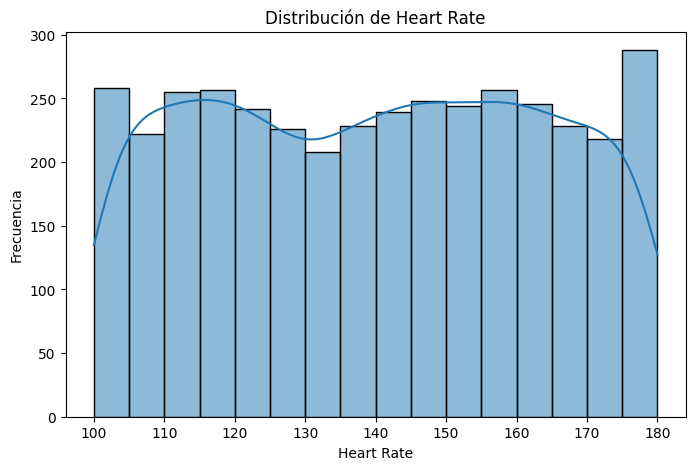

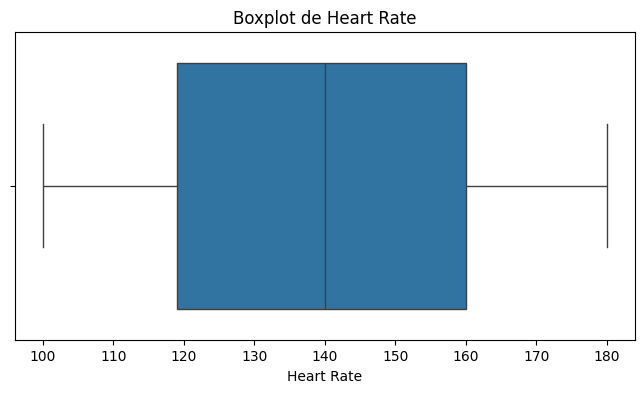

In [228]:
# Medidas de tendencia central de Heart Rate

media = df_no_ID['Heart Rate'].mean()
mediana = df_no_ID['Heart Rate'].median()
moda = df_no_ID['Heart Rate'].mode()
frecuencia_moda = df_no_ID['Heart Rate'].value_counts()[moda]

print(media)
print(mediana)
print(moda)
print(frecuencia_moda)


139.777950310559
140.0
0    103
1    152
Name: Heart Rate, dtype: int64
Heart Rate
103    62
152    62
Name: count, dtype: int64


In [229]:
df_no_ID['Heart Rate'].value_counts()           # Muestra frecuencia valores para Heart Rate

,count
Heart Rate,
103,62
152,62
112,61
144,61
161,60
...,...
136,36
130,36
160,35


In [230]:
# Medidas de dispersión de Heart Rate

std = df_no_ID['Heart Rate'].std()
var = df_no_ID['Heart Rate'].var()

linf = media - 3 * std
lsup = media + 3 * std

print(std)
print(var)
print(linf)
print(lsup)


23.447527801932168
549.786560022382
69.43536690476249
210.1205337163555


In [231]:
# Medidas de posición de Heart Rate

rango = df_no_ID['Heart Rate'].max() - df_no_ID['Heart Rate'].min()
q1 = df_no_ID['Heart Rate'].quantile(0.25)
q2 = df_no_ID['Heart Rate'].quantile(0.50)
q3 = df_no_ID['Heart Rate'].quantile(0.75)
iqr = q3 - q1
linf = q1 - 1.5 * iqr
lsup = q3 + 1.5 * iqr

print(rango)
print(q1)
print(q2)
print(q3)
print(iqr)
print(linf)
print(lsup)


80
119.0
140.0
160.0
41.0
57.5
221.5


In [232]:
# Simetria de valores de Heart Rate

skewness = df_no_ID['Heart Rate'].skew()
print(skewness)

-0.0022989183309950257


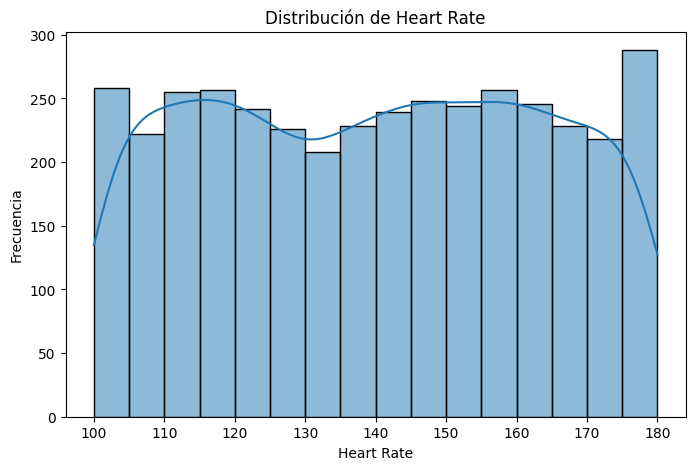

In [233]:
# Histograma de Heart Rate

plt.figure(figsize=(8,5))
sns.histplot(df_no_ID['Heart Rate'], kde=True)
plt.title('Distribución de Heart Rate')
plt.xlabel('Heart Rate')
plt.ylabel('Frecuencia')
plt.show()

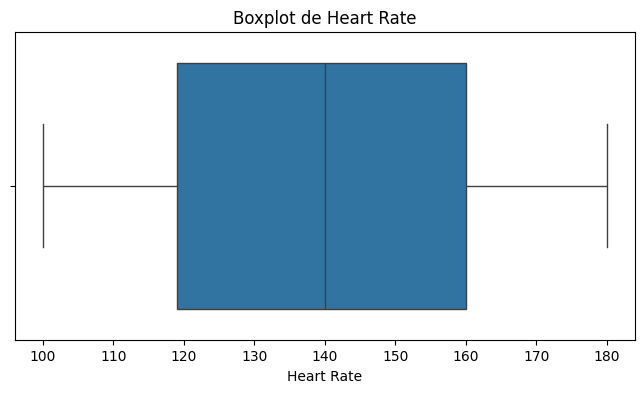

In [234]:
# Gráfico boxplot de Heart Rate

plt.figure(figsize=(8,4))
sns.boxplot(x=df_no_ID['Heart Rate'])
plt.title('Boxplot de Heart Rate')
plt.xlabel('Heart Rate')
plt.show()

4. **BMI**

**Medidas de tendencia central:**

*   Media = 26.801976636759836
*   Mediana = 26.861656215
* Moda =  No hay moda, ya que son 3864 valores únicos.

**Medidas de dispersión**

*   Desviación estándar = 4.746745304111693
*   Varianza = 22.531590982106405

Para la detección de outliers tenemos que mediante la técnica de +/- 3 DS, sus limites quedan definidos como: inferior es 12.561740724424757 y superior es 41.04221254909491

**Medidas de posición**


*   Rango = 16.49662544
*   Primer cuartil (Q1) = 22.68677438
* Segundo cuartil (Q2) = 26.861656215
* Tercer cuartil (Q3) = 30.9503795575
* Rango intercuartilico (IQR) = 8.2636051775


Para la detección de outliers mediante la utilización del rango intercuartilico, los límites quedan definidos como: inferior es 10.291366613749998 y superior es 43.34578732375

**Simetría:** Tambien la distribución es simétrica con un valor de skew tendiente a 0, con un valor de -0.027974502540901693. Por lo anterior, también se puede utilizar +/- 3 DS para la detección de outliers.

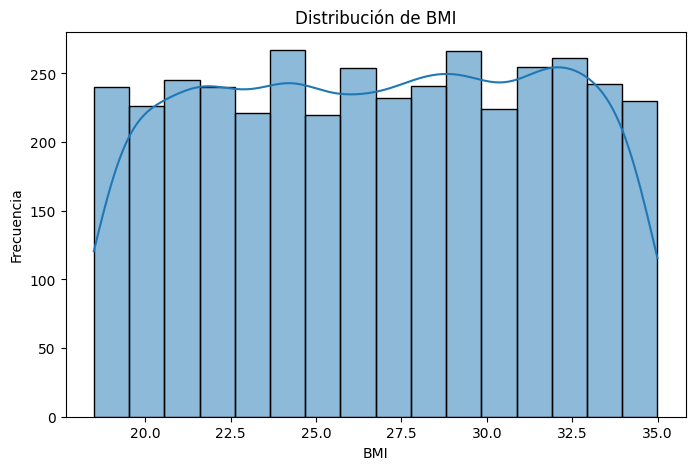


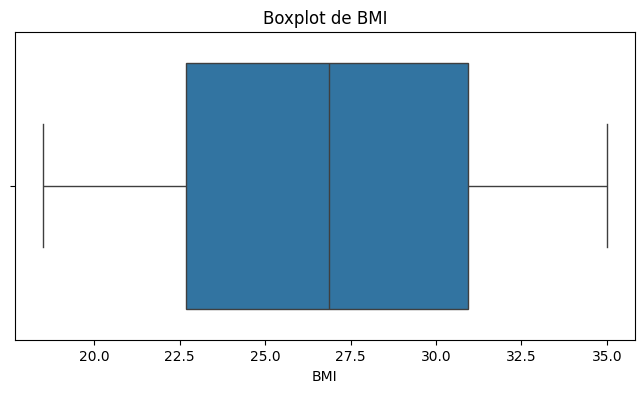

In [235]:
# Medidas de BIM

#Tendencia central
media = df_no_ID['BMI'].mean()
mediana = df_no_ID['BMI'].median()
moda = df_no_ID['BMI'].mode()

#Dispersión
std = df_no_ID['BMI'].std()
var = df_no_ID['BMI'].var()
linf = media - 3 * std
lsup = media + 3 * std

#Posicion
rango = df_no_ID['BMI'].max() - df_no_ID['BMI'].min()
q1 = df_no_ID['BMI'].quantile(0.25)
q2 = df_no_ID['BMI'].quantile(0.50)
q3 = df_no_ID['BMI'].quantile(0.75)
iqr = q3 - q1
linfb = q1 - 1.5 * iqr
lsupb = q3 + 1.5 * iqr

print(media)
print(mediana)
print(moda)


print(std)
print(var)

print(linf)
print(lsup)

print(rango)
print(q1)
print(q2)
print(q3)
print(iqr)

print(linfb)
print(lsupb)

26.801976636759836
26.861656215
0       18.500014
1       18.500941
2       18.506064
3       18.507358
4       18.515636
          ...    
3859    34.987444
3860    34.993114
3861    34.995478
3862    34.995733
3863    34.996639
Name: BMI, Length: 3864, dtype: float64
4.746745304111693
22.531590982106405
12.561740724424757
41.04221254909491
16.49662544
22.68677438
26.861656215
30.9503795575
8.2636051775
10.291366613749998
43.34578732375


In [236]:
# Simetria
skewness = df_no_ID['BMI'].skew()
print(skewness)

-0.027974502540901693


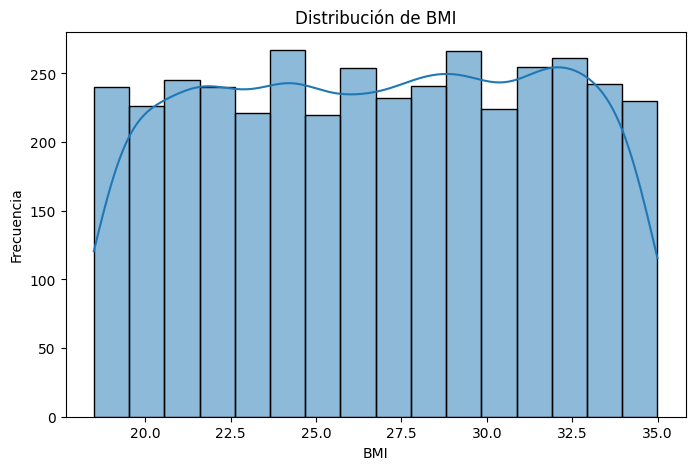

In [237]:
# Histograma de BMI

plt.figure(figsize=(8,5))
sns.histplot(df_no_ID['BMI'], kde=True)
plt.title('Distribución de BMI')
plt.xlabel('BMI')
plt.ylabel('Frecuencia')
plt.show()

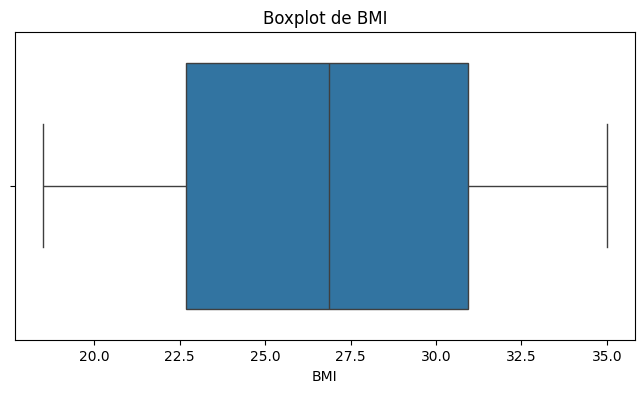

In [238]:
# Boxplot de BMI

plt.figure(figsize=(8,4))
sns.boxplot(x=df_no_ID['BMI'])
plt.title('Boxplot de BMI')
plt.xlabel('BMI')
plt.show()

4. **EXERCISE INTENSITY**

**Medidas de tendencia central:**

*   Media = 5.457298136645963
*   Mediana = 5.0
* Moda = 7, con 420 apariciones.

**Medidas de dispersión**

*   Desviación estándar = 2.8508962032899237
*   Varianza = 8.127609161932902

Para la detección de outliers tenemos que mediante la técnica de +/- 3 DS, sus limites quedan definidos como: inferior es 0 (el valor calculado es -3.095390473223808, pero esta variable no puede tomar valores negativos) y el limite superior es 10 (el valor calculado es 14.009986746515732, pero esta variable no puede tomar valores superiores a 10).

**Medidas de posición**


*   Rango = 9
*   Primer cuartil (Q1) = 3.0
* Segundo cuartil (Q2) = 5.0
* Tercer cuartil (Q3) = 8.0
* Rango intercuartilico (IQR) = 5.0

Para la detección de outliers mediante la utilización del rango intercuartilico, los límites quedan definidos como: inferior es 0 (el valor calculado es -4.5, pero este parametro no puede tomar un valor negativo) y superior es 10 (el valor calculado es 15.5, pero este parametro no puede tomar un valor > a 10)

**Simetría:** Tambien la distribución es simétrica con un valor de skew tendiente a 0, con un valor de 0.013750650639101381. Por lo anterior, también se puede utilizar +/- 3 DS para la detección de outliers.

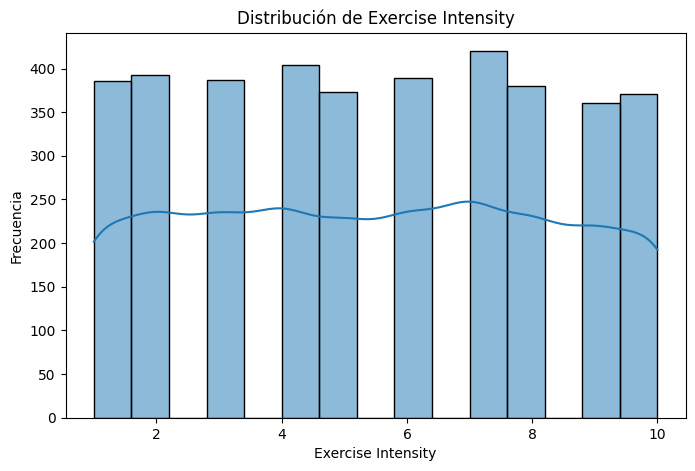

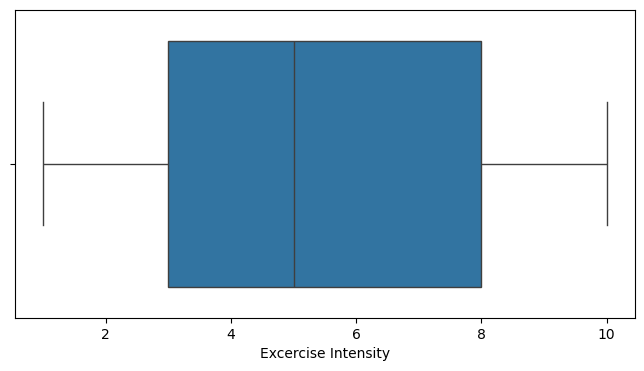

In [239]:
# Estadisticos de Exercise Intensity

#Tendencia central
media = df_no_ID['Exercise Intensity'].mean()
mediana = df_no_ID['Exercise Intensity'].median()
moda = df_no_ID['Exercise Intensity'].mode()
frecuencia_moda = df_no_ID['Exercise Intensity'].value_counts()[moda]

print(media)
print(mediana)
print(moda)
print(frecuencia_moda)

#Dispersión
std = df_no_ID['Exercise Intensity'].std()
var = df_no_ID['Exercise Intensity'].var()
linf = media - 3 * std
lsup = media + 3 * std

print(std)
print(var)
print(linf)
print(lsup)

5.457298136645963
5.0
0    7
Name: Exercise Intensity, dtype: int64
Exercise Intensity
7    420
Name: count, dtype: int64
2.8508962032899237
8.127609161932902
-3.095390473223808
14.009986746515732


In [240]:
# Medidas de posicion

rango = df_no_ID['Exercise Intensity'].max() - df_no_ID['Exercise Intensity'].min()
q1 = df_no_ID['Exercise Intensity'].quantile(0.25)
q2 = df_no_ID['Exercise Intensity'].quantile(0.50)
q3 = df_no_ID['Exercise Intensity'].quantile(0.75)
iqr = q3 - q1

linf = q1 - 1.5 * iqr
lsup = q3 + 1.5 * iqr

print(rango)
print(q1)
print(q2)
print(q3)
print(iqr)
print(linf)
print(lsup)

9
3.0
5.0
8.0
5.0
-4.5
15.5


In [241]:
# Simetria
skewness = df_no_ID['Exercise Intensity'].skew()
print(skewness)


0.013750650639101381


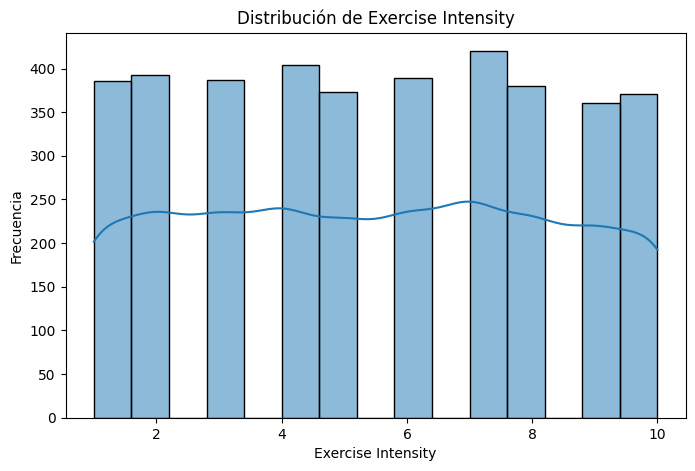

In [242]:
# Histograma Exercise intensity

plt.figure(figsize=(8,5))
sns.histplot(df_no_ID['Exercise Intensity'], kde=True)
plt.title('Distribución de Exercise Intensity')
plt.xlabel('Exercise Intensity')
plt.ylabel('Frecuencia')
plt.show()

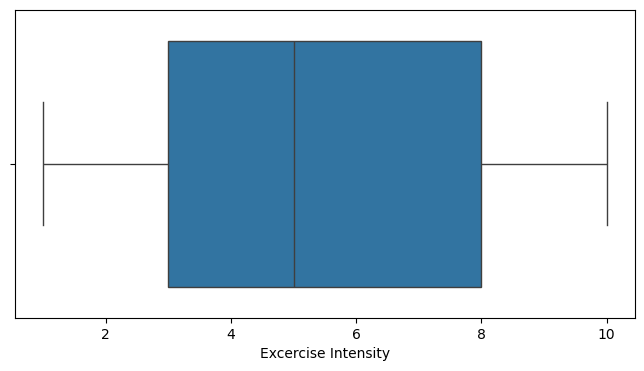

In [243]:
# Boxplot Exercise Intensity

plt.figure(figsize=(8,4))
sns.boxplot(x=df_no_ID['Exercise Intensity'])
plt.xlabel('Excercise Intensity')
plt.show()

In [244]:
df.dtypes

,0
ID,int64
Exercise,object
Calories Burn,float64
Dream Weight,float64
Actual Weight,float64
Age,int64
Gender,object
Duration,int64
Heart Rate,int64
BMI,float64


# **4. ANALISIS DE VARIABLES CUALITATIVAS**

En esta sección se analizan las variables cualitativas del dataset, las cuales son:



*   Exercise: tipo de ejercicio realizado
*   Gender: género del participante
* Weather Conditions: condiciones ambientales al realizar ejercicio



1. **EXERCISE**

**Tipo de variable cualitativa**: Si bien no se puede asegurar, no pareciera ser que las categorias de ejercicio sigan una jerarquización (siendo Exercise 1 el menos complejo y Exercise 10 el más complejo), por lo que sería una variable cualitativa nominal

**N° de categorías**: Se compone de 10 categorías (Exercise 1, Exercise 2, Exercise 3, Exercise 4, Exercise 5, Exercise 6, Exercise 7, Exercise 8, Exercise 9 y Exercise 10).

**Moda**: La moda es Exercise 5 con 404 apariciones, seguido por Exercise 1 con 403 apariciones.

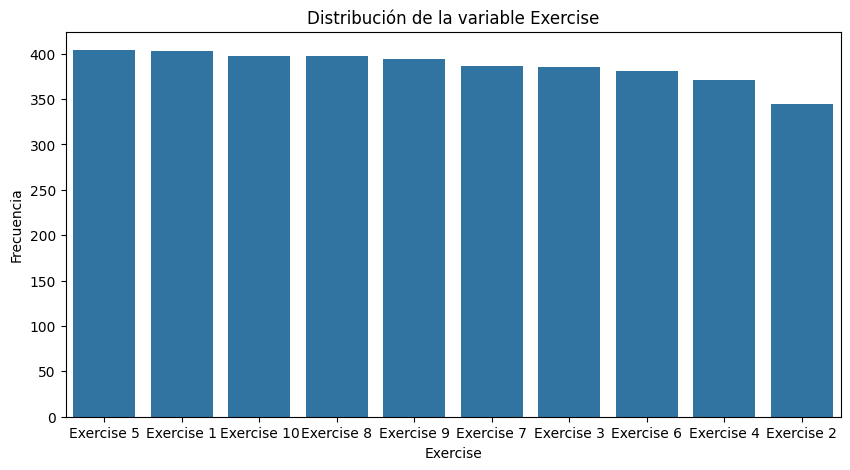

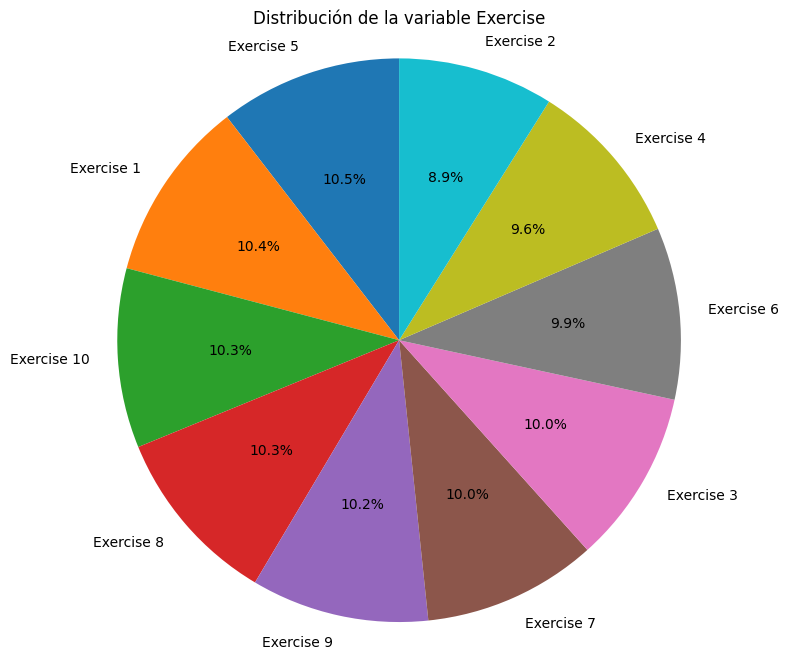

In [245]:
df_no_ID['Exercise'].unique()     #Categorias para variable Exercise

array(['Exercise 2', 'Exercise 7', 'Exercise 4', 'Exercise 5',
       'Exercise 10', 'Exercise 1', 'Exercise 9', 'Exercise 8',
       'Exercise 6', 'Exercise 3'], dtype=object)

In [246]:
df_no_ID['Exercise'].nunique()

10

In [247]:
df_no_ID['Exercise'].value_counts()   # Numero de valores por cada categoria de Exercise

,count
Exercise,
Exercise 5,404
Exercise 1,403
Exercise 10,398
Exercise 8,397
Exercise 9,394
Exercise 7,386
Exercise 3,385
Exercise 6,381
Exercise 4,371


In [248]:
moda = df_no_ID['Exercise'].mode()
frecuencia_moda = df_no_ID['Exercise'].value_counts()[moda]
print(moda)
print(frecuencia_moda)

0    Exercise 5
Name: Exercise, dtype: object
Exercise
Exercise 5    404
Name: count, dtype: int64


In [249]:
df_no_ID['Exercise'].value_counts()       # Numero de valores por cada categoria de Exercise
df_no_ID['Exercise'].value_counts(normalize=True) * 100     #Expresado como porcentaje del total

,proportion
Exercise,
Exercise 5,10.455487
Exercise 1,10.429607
Exercise 10,10.300207
Exercise 8,10.274327
Exercise 9,10.196687
Exercise 7,9.989648
Exercise 3,9.963768
Exercise 6,9.860248
Exercise 4,9.601449


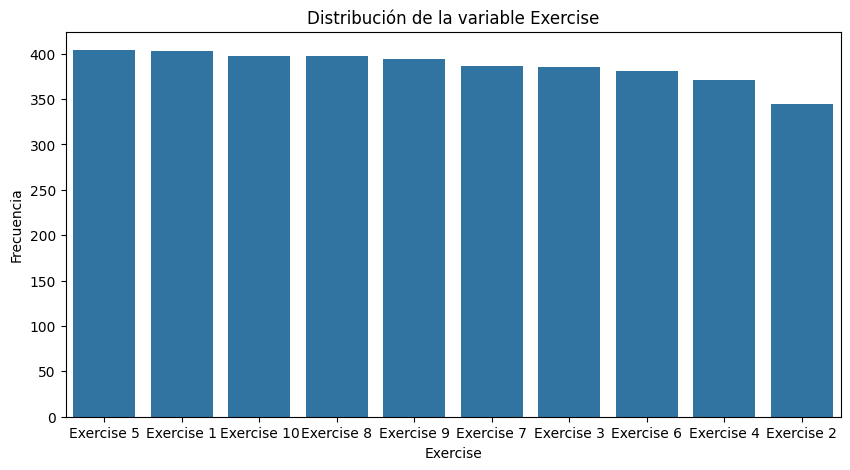

In [250]:
# Grafico de barras de Exercise

plt.figure(figsize=(10,5))
sns.countplot(x=df_no_ID['Exercise'], order=df_no_ID['Exercise'].value_counts().index)

plt.title('Distribución de la variable Exercise')
plt.ylabel('Frecuencia')
plt.show()

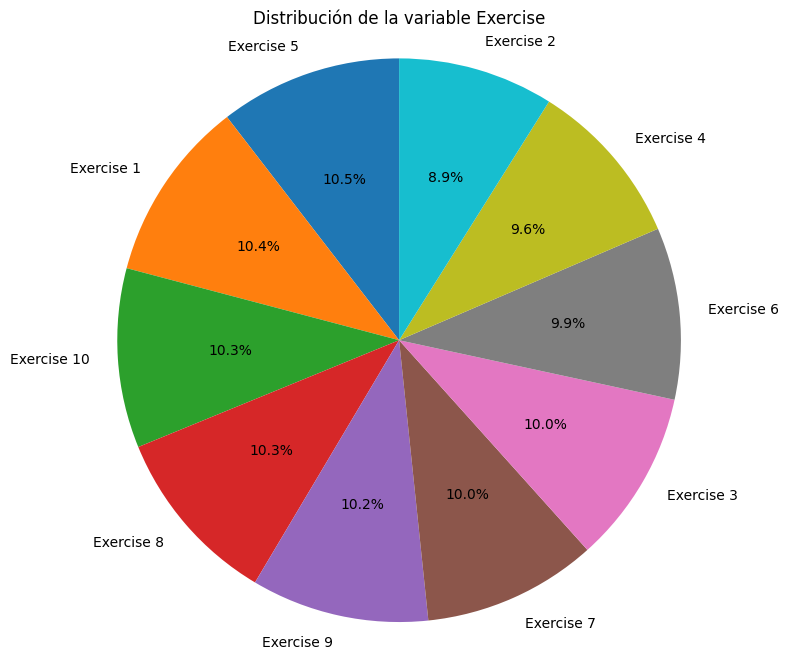

In [251]:
# Grafico de torta de exercise

# Contar categorías
counts = df["Exercise"].value_counts()

plt.figure(figsize=(8,8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribución de la variable Exercise")
plt.axis('equal')  # Mantiene la forma circular
plt.show()


2. **GENDER**

**Tipo de variable cualitativa**: Es una variable dicotómica.

**N° de categorías**: Se compone de 2 categorías (Male, Female).

**Distribución**: Hay 1900 (49.17%) Male y 1964 (50.82%) Female.


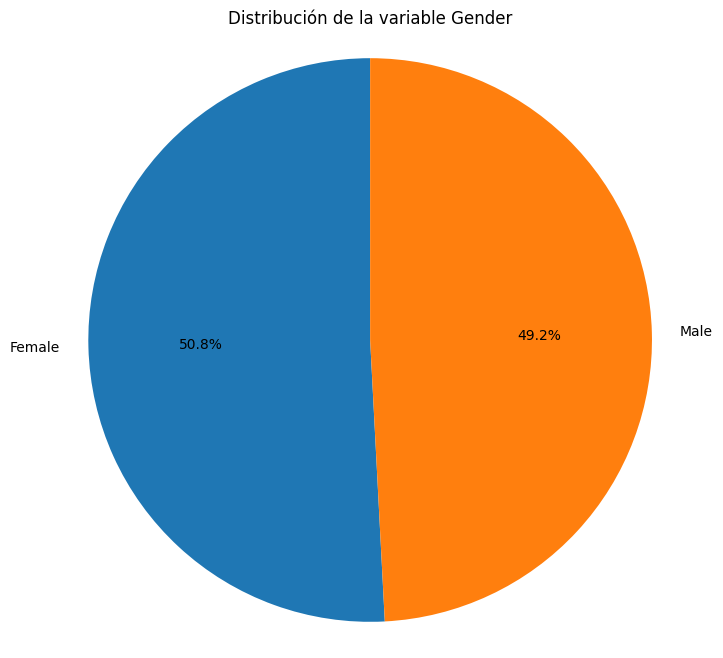

In [252]:
df_no_ID['Gender'].nunique()        # Numero de categorias para Gender

2

In [253]:
df_no_ID['Gender'].unique()       # Categorias de Gender

array(['Male', 'Female'], dtype=object)

In [254]:
df_no_ID['Gender'].value_counts()


,count
Gender,
Female,1964
Male,1900


In [255]:
df_no_ID['Gender'].value_counts(normalize=True) *100

,proportion
Gender,
Female,50.828157
Male,49.171843


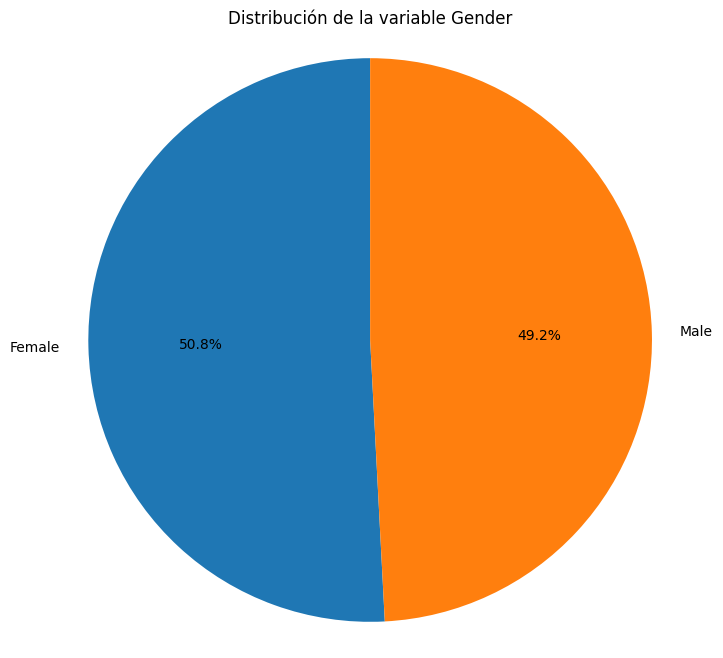

In [256]:
# Grafico de torta de Gender

# Contar categorías
counts = df["Gender"].value_counts()

plt.figure(figsize=(8,8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribución de la variable Gender")
plt.axis('equal')  # Mantiene la forma circular
plt.show()


3. **WEATHER CONDITIONS**

**Tipo de variable cualitativa**: No parece tener una jerarquización implicita (aunque pudiera darsele si se quisiera ordenar de mejor a peor clima, Sunny - Cloudy - Rainy), por lo que es variable cualitativa nominal.

**N° de categorías**: Se compone de 3 categorías (Cloudy, Rainy, Sunny).

**Distribución**: Hay 1332 Cloudy (34.47%), 1295 Rainy (33.51%) y 1237 Sunny (32.01%).

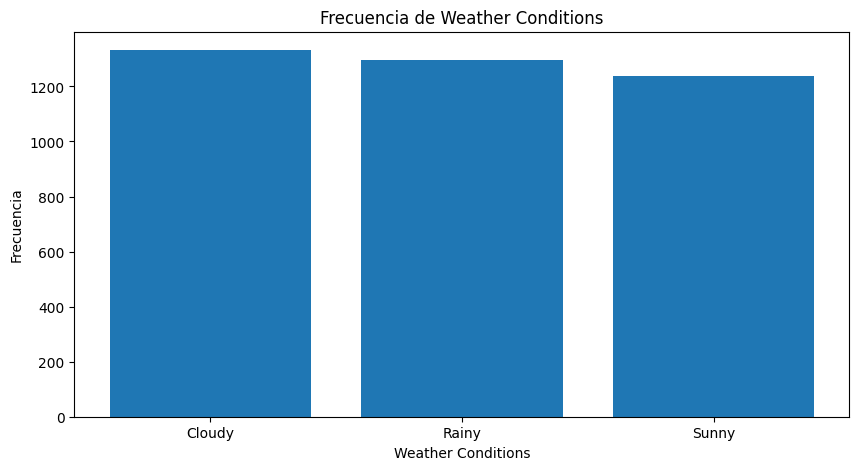

In [257]:
df_no_ID['Weather Conditions'].nunique()

3

In [258]:
df_no_ID['Weather Conditions'].unique()

array(['Rainy', 'Cloudy', 'Sunny'], dtype=object)

In [259]:
df_no_ID['Weather Conditions'].value_counts()

,count
Weather Conditions,
Cloudy,1332
Rainy,1295
Sunny,1237


In [260]:
df_no_ID['Weather Conditions'].value_counts(normalize=True)*100


,proportion
Weather Conditions,
Cloudy,34.472050
Rainy,33.514493
Sunny,32.013458


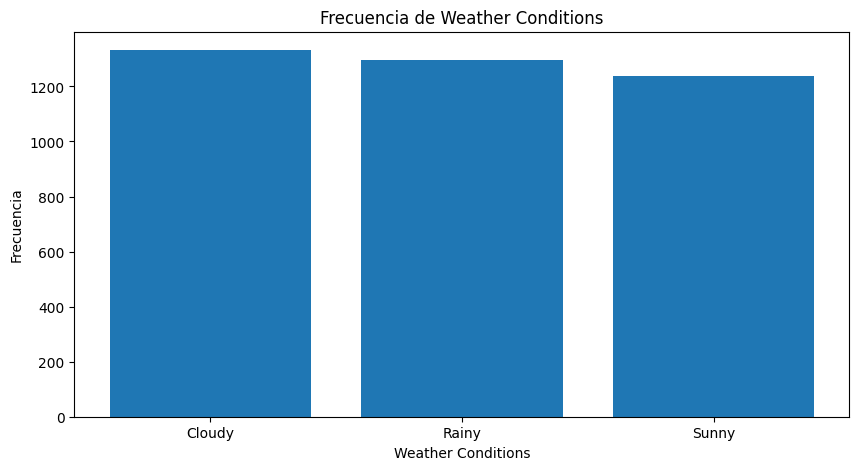

In [261]:
# Grafico de barras de Weather Conditions

plt.figure(figsize=(10,5))
plt.bar(df_no_ID['Weather Conditions'].value_counts().index
        ,df_no_ID['Weather Conditions'].value_counts())
plt.xlabel('Weather Conditions')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Weather Conditions')
plt.show()